In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred




In [42]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel(r"C:\Users\acer\Documents\GitHub\SMILE_to_Feature\Generate Data\DataTb_generate.xlsm",sheet_name="56k")

#Select feature for data
X_data= df["SMILE"]
Y_data= df["Tb"]


In [43]:
X_data_use = X_data[:10000]
Y_data = Y_data[:10000]

X_data_use["molecule"] = X_data_use.apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
#X_data_use

In [44]:
#X_data
X_data_fp = []
for i in range(0,X_data_use.shape[0]-2):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)

In [45]:
#X_data_fp
#Y_data

In [46]:
# %%
X_train, X_test, y_train, y_test = train_test_split(X_data_fp, Y_data,test_size=0.3,random_state=42)
########   Model  ########
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [47]:

# %%
# Train set
y_predict_train = Linear.predict(X_train)
#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = Linear.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
y_predict_total = Linear.predict(X_data_fp)
mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
R2_total = r2_score(Y_data, y_predict_total)


In [48]:
# Table Score
Morgan_fp__ML_MLR = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test, mape_total],
        "RMSE":[rmse_train, rmse_test, rmse_total],
        "R2"  :[R2_train, R2_test, R2_total]
    }
Morgan_fp__ML_MLR = pd.DataFrame(data)
#Morgan_fp__ML_MLR.to_csv('Morgan_fp ML-MLR.csv', index=False)

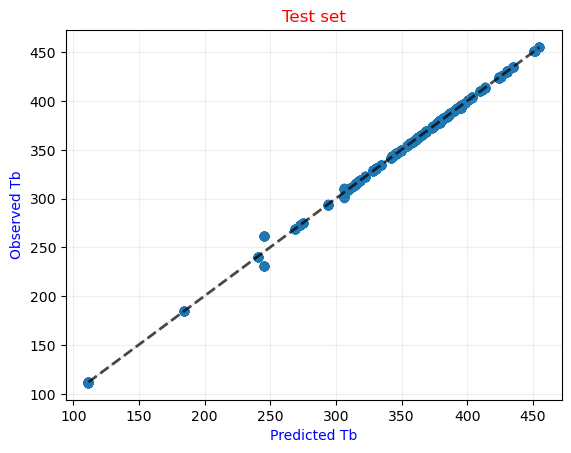

In [49]:
# Plot
# %%
p1=sn.regplot(x=y_predict_test, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.2)
#R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
#MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
#plt.legend(handles=[R2, MAE])


In [51]:
Morgan_fp__ML_MLR

,MAPE,RMSE,R2
0,0.002081,2.224155,0.998225
1,0.002204,2.372223,0.998197
2,0.002118,2.269590,0.998217


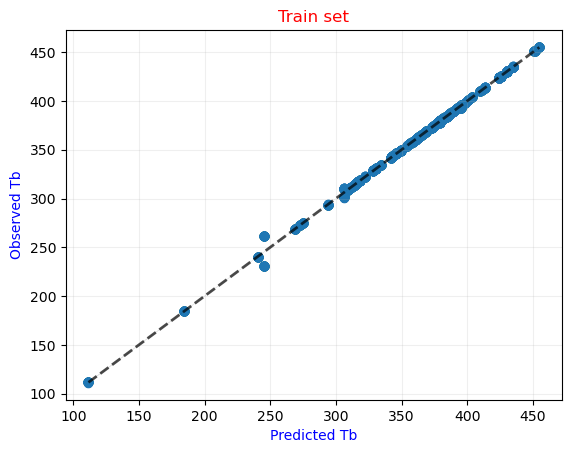

In [50]:

# %%
y_predict_train = Linear.predict(X_train)
p2=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Train set", color='red')
plt.grid(alpha=0.2)
#R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
#MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
#plt.legend(handles=[R2, MAE])
